## PROJET 1: Analyse Exploratoire Des Données  
<h3 style="color:black;text-align:center;padding: 2% 20% ">STEVE DIFFO</h3>

###                PROBLEMATIQUE 1: Comment analyser les transactions Bancaires pour identifier les schemas de fraude / How to analyze  bank transaction to identify patterns of fraud

## Table des matieres/ table of contents 
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#preparationDonnees">Préparation des Données</a></li>
<li><a href="#Analyse">Analyse Exploratoire des Données</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>


<a id='intro'></a>
## INTRODUCTION

> Ce rapport permet d'analyser les transactions Bancaires . nous allons utiliser un ensemble de données provenant de Kaggle . le lien vers notre ensemble de données ce trouve sur L'URL https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud



>L'objectif principal est : ** d'identifer les schemas de fraude dans les transactions bancaires 

In [19]:
# importation des bibliotheques 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

%matplotlib inline


<a id='preparationDonnees'></a>

## PREPARATION DES DONNEES 

> Dans cette partie nous allons charger nos donneées ,vérifier leurs proprietés et les néttoyées

## PROPREITE GENERALE DES DONNEES



In [20]:
# chargement des données

df= pd.read_csv('creditcard.csv')

# afficharge des dimension de notre df
print ("dimension :",df.shape)

# afficharge des infos 
print("infos :",df.info())
# afficharde l'entete
print("entete des donnees")

df.head()


dimension : (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


> Nous constatons que nous avons 284807 lignes et 31 colonnes 
>> Nous avons 30 colonnes de type reel et 1 colonne "Class" de type entier  


# Nettoyage 

## Identifiez et traitez les valeurs manquantes.

In [21]:
# Vérification des valeurs vides
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

>Nous constons que nous n'avons pas de valeurs vide dans notre ensemble de données

In [22]:
# vérification des valeurs dupliquées
df.duplicated().sum()

1081

> Nous Constatons que nous avons plusieurs  valeurs qui sont dupliquees Nous allons les supprimées pour que notre travail soit plus coherent 

In [23]:
# Garder la dernière occurrence des valeurs en double
df = df.drop_duplicates(keep='last')


In [24]:
df.duplicated().sum()

0

In [25]:
sample = df.sample(n=5 , replace = False)
sample
#print(sample.iloc[:,-3:])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
44254,41864.0,-32.962810,18.183626,-32.965346,6.596083,-23.505167,-4.639617,-22.518547,18.709255,-3.747177,...,0.587373,-2.026372,-1.219814,0.162653,2.328541,-0.216531,1.120581,0.379304,89.99,0
163742,116175.0,-3.893747,3.639053,-2.871088,-0.685207,-2.020722,-1.578313,-1.312340,2.625590,0.261307,...,-0.233997,-0.787167,0.440700,0.012060,0.002825,0.155509,-0.047423,-0.150968,13.86,0
215304,140015.0,2.104108,-0.230161,-1.245453,-0.573051,-0.279056,-1.538671,0.170683,-0.398004,0.809750,...,-0.289812,-0.740111,0.362135,0.066879,-0.399279,0.538420,-0.102789,-0.066663,4.00,0
155160,104658.0,-2.058976,-0.908005,1.464371,-0.137022,1.901014,-1.626956,-0.731512,-0.507470,2.497212,...,-0.440635,-0.178482,-0.688308,-0.099725,-0.982299,-1.100991,-0.097429,0.046667,2.12,0
125699,77763.0,-3.107546,2.597966,-2.541697,0.975904,-1.098314,-1.017056,-1.031556,2.142175,-1.130434,...,0.321030,0.445762,0.293031,-0.428666,-0.470088,-0.390769,-0.525074,-0.278630,0.74,0




## Signification de chaque   variables
>les Caractéristiques V1, V2, ... Les V28 sont les principaux composants obtenus avec l’ACP. 

>La fonction « Temps » contient les secondes écoulées entre chaque transaction et la première transaction dans l’ensemble de données.

>La fonctionnalité 'Montant' est le montant de la transaction, cette fonctionnalité peut être utilisée pour l’apprentissage sensible aux coûts dépendant de l’exemple.

>La caractéristique 'Class' est la variable de réponse et elle prend la valeur 1 en cas de fraude et 0 dans le cas contraire.



In [26]:
# variable class
ligne_fraude = df[df['Class']==1].shape[0]
print(f"nombre de cas de fraude est: {ligne_fraude}")
pas_fraude = df[df['Class']==0].shape[0]
print(f"nombre de cas dont il y'a pas de fraude est: {pas_fraude}")

nombre de cas de fraude est: 473
nombre de cas dont il y'a pas de fraude est: 283253


> Donc nous constatons que nous avons 473 cas de fraude sur 284807 transactions et 283253 cas d'absence de fraude 

### Cas de non fraude analyse statistique 

In [27]:
df[df['Class']==0].describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,...,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.0
mean,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.001150,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575,0.0
std,47475.550607,1.922179,1.633520,1.457593,1.398575,1.355816,1.329914,1.177480,1.157140,1.086902,...,0.715629,0.723541,0.621165,0.605748,0.520612,0.482080,0.392700,0.327563,250.379023,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54233.000000,-0.913431,-0.601398,-0.883966,-0.851605,-0.687888,-0.767543,-0.550146,-0.208841,-0.641649,...,-0.228406,-0.542737,-0.161490,-0.354306,-0.317476,-0.326853,-0.070650,-0.052808,5.670000,0.0
50%,84711.000000,0.022562,0.062561,0.182247,-0.024500,-0.052807,-0.274172,0.041664,0.021633,-0.051368,...,-0.029798,0.006675,-0.011077,0.041115,0.016190,-0.052293,0.001368,0.011238,22.000000,0.0
75%,139308.000000,1.316788,0.797012,1.028261,0.734231,0.612442,0.397678,0.571029,0.324473,0.596969,...,0.185470,0.528136,0.147633,0.440051,0.350490,0.240023,0.090760,0.077961,77.460000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


### Cas de fraude analyse statistique

In [28]:
df[df['Class']==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,...,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.0
mean,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860,1.0
std,48636.179973,6.593145,4.122500,6.909647,2.871523,5.278831,1.715347,6.858024,5.585950,2.465047,...,2.731191,1.181295,1.508570,0.517900,0.806785,0.463016,1.245779,0.533100,260.211041,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41203.000000,-5.603690,1.145381,-7.926507,2.288644,-4.278983,-2.450444,-6.989195,-0.161518,-3.796760,...,0.027935,-0.521934,-0.341881,-0.436539,-0.320311,-0.263078,-0.015551,-0.097223,1.000000,1.0
50%,73408.000000,-2.271755,2.617105,-4.875397,4.100098,-1.372245,-1.420468,-2.902079,0.617738,-2.099049,...,0.573898,0.055179,-0.075034,-0.061263,0.077913,0.012792,0.394682,0.145895,9.820000,1.0
75%,129095.000000,-0.361428,4.571743,-2.171454,6.290918,0.260821,-0.413647,-0.907188,1.709417,-0.788388,...,1.192694,0.616383,0.287659,0.282030,0.463827,0.395528,0.821048,0.372393,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


>#### Interprétation partielle des Résultat 
>>Nous constatons que le temps minimal d'une transaction frauduleuse est de 406 sécondes et la moyenne est de 80450.513742 et le maximun est de 170348
>> Aussi nous constatons que le montant minimal d'une transaction frauduleuse est de : 0 , max : 2125.87 et la moyenne est de : 123.871860
>>##### Nous constatons que les transaction frauduleuse se font généralement sur des petit montant en moyenne 123.87 et qu'il ne dépasse pas 2125.87 pour ne pas se faire repérés faciliment et cela prend plus de temps 

          _________________________________________________________________________________________                    
                              


<a id= "Analyse"></a>
# Analyse Exploratoire Des Donnees

>Dans cette partie nous allons analyser comment les diffrentes variable sont reparties en fonction de la variable 'Class' leur dégré de liaison

### Analyse des distributions 

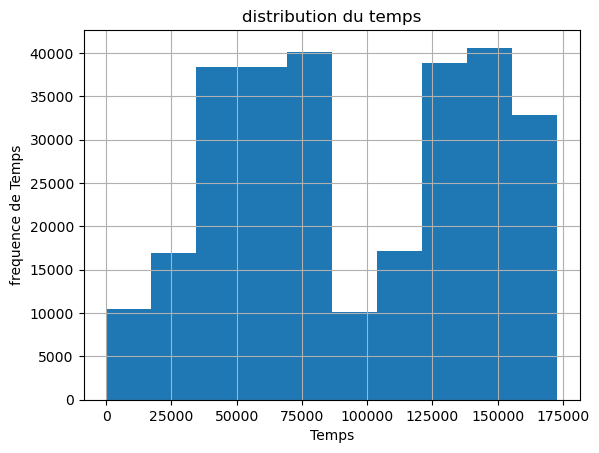

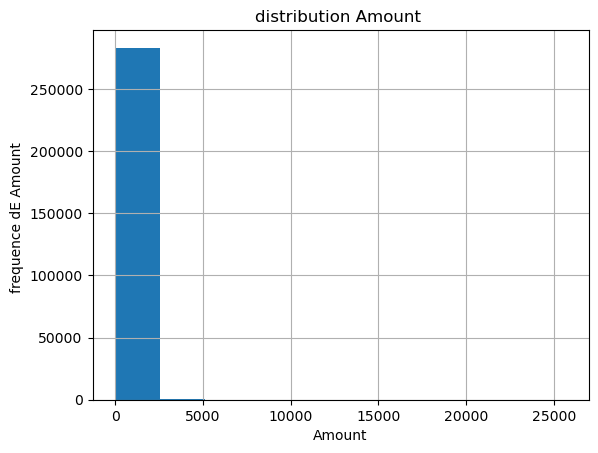

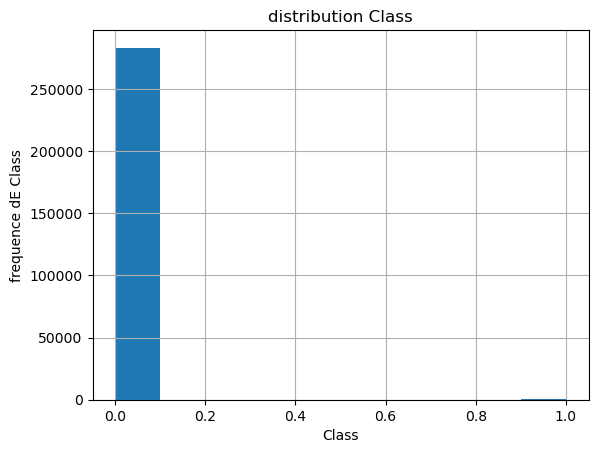

In [29]:
import matplotlib.pyplot as plt
df['Time'].hist()
plt.title('distribution du temps')
plt.xlabel('Temps')
plt.ylabel('frequence de Temps')
plt.show()


df['Amount'].hist()
plt.title('distribution Amount ')
plt.xlabel('Amount')
plt.ylabel('frequence dE Amount ')
plt.show()


df['Class'].hist()
plt.title('distribution Class')
plt.xlabel('Class')
plt.ylabel('frequence dE Class')
plt.show()

## statistique descriptive

In [30]:
from scipy.stats import shapiro

stat, p = shapiro(df['Amount'])
if p > 0.05:
    print("La distribution semble normale",stat,p)
else:
    print("La distribution des montant n'est pas normale",stat,p)


La distribution des montant n'est pas normale 0.31004834175109863 0.0


C:\Users\Meranda\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
stat, p = shapiro(df['Time'])
if p > 0.05:
    print("La distribution semble normale",stat,p)
else:
    print("La distribution du temps n'est pas normale",stat,p)

La distribution du temps n'est pas normale 0.9403241276741028 0.0


In [32]:
stat, p = shapiro(df['Class'])
if p > 0.05:
    print("La distribution semble normale",stat,p)
else:
    print("La distribution class n'est pas normale",stat,p)


La distribution class n'est pas normale 0.017345666885375977 0.0


### Comme les données ne sont pas normalements distribuées alors nous allons utiliser le test de spearmane pour détermiser le dégré de correlation des montant et temps par rapport au class

In [33]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns


# Extraire les colonnes pertinentes
Amount = df['Amount']
Class = df['Class']

# Visualisation de la tendance
#sns.regplot(df, x="Time", y="Class", robust=True, line_kws=dict(color="r"))

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(Amount, Class)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")
if spearman_p_value > 0.05:
    print("La distribution semble normale",spearman_p_value)
else:
    print("La distribution class n'est pas normale",spearman_p_value)

Coefficient de corrélation de Spearman: -0.007882288853356088
Valeur p: 2.6854451508839174e-05
La distribution class n'est pas normale 2.6854451508839174e-05


In [34]:
# Extraire les colonnes pertinentes
Time = df['Time']
Class = df['Class']

# Visualisation de la tendance
#sns.regplot(df, x="Time", y="Class", robust=True, line_kws=dict(color="r"))

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(Time, Class)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")
if spearman_p_value > 0.05:
    print("La distribution semble normale",spearman_p_value)
else:
    print("La distribution class n'est pas normale",spearman_p_value)

Coefficient de corrélation de Spearman: -0.011910772556846584
Valeur p: 2.2303069683405324e-10
La distribution class n'est pas normale 2.2303069683405324e-10


#### Donc d'après le test de spearman le temps et le montant n'ont pas une forte correlations avec le type de transaction  


## Conclusion

### Résumé des Objectifs et de la Méthodologie
L'objectif principal de cette analyse était de détecter les schémas de fraude dans les transactions bancaires afin de prévenir les activités frauduleuses futures. Nous avons suivi un processus structuré comprenant la collecte des données, le prétraitement, l'analyse exploratoire et l'application de règles de détection de fraude.

### Principaux Résultats et Observations

Les statistiques descriptives ont révélé que les transactions frauduleuses avaient tendance à avoir des montants plus faible (moins de 3000) et des fréquences moins élevées par rapport aux transactions non frauduleuses.

### Recommandations
- **Améliorations** : Ajuster les seuils de détection des montants et des fréquences, et intégrer de nouvelles variables dans les modèles de détection.
- **Surveillance Continue** : Mettre en place des systèmes de surveillance en temps réel pour détecter les fraudes dès qu'elles se produisent.
- **Formation et Sensibilisation** : Organiser des formations pour les employés et les clients sur les schémas de fraude courants et les mesures de prévention.

En conclusion, cette analyse a permis d'identifier des schémas de fraude clairs et de proposer des recommandations pratiques pour améliorer la détection et la prévention des fraudes bancaires.
